In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
x = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int) #Setosa

per_clf = Perceptron()
per_clf.fit(x,y)

y_pred = per_clf.predict([[2, 0.5]])

## 10.2.2 시퀀셜 API --> 이미지 분류기 생성

In [1]:
import tensorflow as tf
from tensorflow import keras
import pydot

In [2]:
tf.__version__

'2.4.1'

In [3]:
keras.__version__

'2.4.0'

### 데이터 셋 적재

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train_full.shape

(60000, 28, 28)

28 x 28 픽셀의 6만장의 이미지가 들어가 있다고 생각하면 될 듯.

픽셀 강도는 0에서 255까지 표현되어 있다고 한다.

In [6]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

- 검증 셋 생성

In [7]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0 #x train 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.0 

#근데 저렇게 255.0으로 나눠주는 이유는 잘 모르겠다.

- 클래스 이름의 리스트를 만들어야 함

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [9]:
class_names[y_train[0]]

'Coat'

### 시퀀셜 API를 사용하여 모델 구축

- 두 개의 은닉층을 가진 분류용 다층 퍼셉트론

In [10]:
model = keras.models.Sequential() #순서대로 층을 쌓아서 구성한다고 한다. 이게 시퀀셜 API
model.add(keras.layers.Flatten(input_shape = [28,28])) #이미지를 1D 배열로 변환 
model.add(keras.layers.Dense(300, activation = 'relu')) #뉴런 300개를 가진 층. 활성화함수는 relu
model.add(keras.layers.Dense(100, activation = 'relu')) #뉴런 100개를 가진 층. 활성화함수는 relu
model.add(keras.layers.Dense(10, activation = 'softmax')) #뉴런 10개를 가진 층. 활성화함수는 softmax

#<Tip>
#activation = 'relu' 와 activation = keras.activations.relu는 같다

- Sequential을 만들 때 매 층의 리스트를 전달할 수 있다!

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


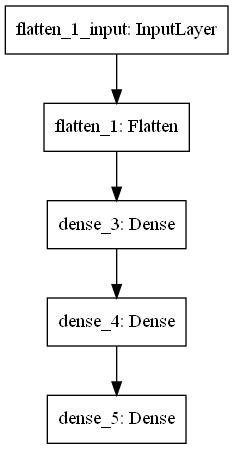

In [13]:
#이렇게 하면 모델 구조를 이미지로 출력이 가능하다
keras.utils.plot_model(model = model)

In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]

In [16]:
hidden1.name

'dense_3'

파라미터는 get_weights() 메서드와 set_weights() 메서드를 사용하여 접근할 수 있다.

In [17]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)

[[ 0.01942999  0.04954857 -0.03852788 ...  0.06800514  0.00704558
   0.00775705]
 [-0.01167188 -0.06899042 -0.07314124 ...  0.0082371   0.02603365
  -0.00319489]
 [ 0.03169858  0.0110767   0.00568204 ...  0.05190484  0.04923534
  -0.05735214]
 ...
 [-0.00906057  0.01835449 -0.03941372 ...  0.05750856  0.04776324
  -0.07026526]
 [ 0.07146287 -0.00862069  0.03847181 ...  0.07201545 -0.07260031
   0.05280574]
 [-0.04043031 -0.01039186 -0.05001516 ...  0.01443327 -0.05504945
   0.07077521]]
(784, 300)


input 이었던 784개에 대해 각 300개의 뉴런에 대응하는 가중치가 있다! 한 뉴런에는 784개의 가중치 값이 있고, 이러한 뉴런이 300개가 있으니 784 x 300의 array가 생기는 형식

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

Dense의 첫번째 층은 대칭성을 깨뜨리기 위해 연결 가중치를 무작위로 섞음! 그래서 weight가 무작위로 선정돼 있는 것이다.(모두 1이면 같은 뉴런이 된다)
bias는 0으로 초기화 됨 

### model compile

compile 매서드를 통해 손실 함수와 옵티마이저를 지정해야 함

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = 'sgd', #stocastic gradient descent
              metrics = ['accuracy'] #훈련과 평가 시에 정확도를 측정하기 위해 accuracy를 사용!
             )

### model train and validation

In [21]:
history = model.fit(x = x_train, y = y_train, epochs = 30 #30번 반복?
                   , validation_data = (x_valid, y_valid) #이렇게 검증 셋을 지정해줄 수 있음
                   )

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0221 - accuracy: 0.6734 - val_loss: 0.5205 - val_accuracy: 0.8182
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5070 - accuracy: 0.8243 - val_loss: 0.4526 - val_accuracy: 0.8410
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4497 - accuracy: 0.8422 - val_loss: 0.4128 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4166 - accuracy: 0.8546 - val_loss: 0.4145 - val_accuracy: 0.8552
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3922 - accuracy: 0.8621 - val_loss: 0.3951 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3798 - accuracy: 0.8656 - val_loss: 0.3859 - val_accuracy: 0.8654
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.8705 - val_loss: 0.3927 - val_accuracy:

|
> 상당히 크리티컬한 내용 : 클래스가 편중돼 있을 경우, 클래스에 가중치를 부여할 수 있다. class_weight를 통해서 적게 등장하는 클래스에 높은 가중치를 부여하고, 많이 등장하는 클래스에 낮은 가중치를 부여하면 된다

- fit 메서드가 반환하는 객체

1)훈련 파라미터, 2)수행된 에포크 리스트, <span style="color:lightblue">**3)에포크가 끝날때마다 훈련 세트와 검증 세트에 대한 손실과 측정한 지표를 담은 딕셔너리**</span>



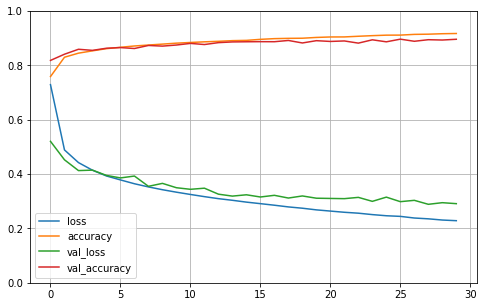

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


> 검승 손실은 에포크가 끝난 후에 계산되고, 훈련 손실은 에포크가 진행되는 동안 계산되기 때문에, 훈련 곡선은 에포크의 절반만큼 왼쪽으로 이동해야 한다.

> train을 계속하고 싶다면 fit() 메서드를 이용하면, 중지되었던 곳부터 다시 시작하게 될 것이다.

> **가장 먼저 튜닝해야할 hyperparameter는 학습률!!**

- holdout set 예측

모델 상용화 이전에 모델의 일반화 오차를 추정할 수 있다.

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8803


[0.3338747024536133, 0.880299985408783]

### Predict

새로운 샘플에 대해 예측을 진행할 수 있다

In [24]:
x_new = x_test[:3]
y_proba = model.predict(x_new)

y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

> class : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

> 해석 : 첫번째 이미지에 대해서는 9클래스(ankle boot)일 확률이 99%, 7클래스(sneaker)일 확률이 1%라고 예측한 것이다.

predict_classes()라는 메서드를 통해 클래스만 분류할 수 있다.

In [25]:
import numpy as np
y_pred = model.predict_classes(x_new)
y_pred

np.array(class_names)[y_pred]

C:\Users\jiho0\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]

y_new

array([9, 2, 1], dtype=uint8)

## 10.2.3 회귀용 다층 퍼셉트론 생성 

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
#데이터 적재
housing = fetch_california_housing()

#train test 데이터 분할
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

#train - valid 데이터 분할
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

#표준화 작업을 거쳐주는 것 같다.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [36]:
#housing은 무슨 데이터인가
print(housing['feature_names']) 

print(" *데이터 : {0} \n *예측변수 : {1} ".format(housing['data'][1], housing['target'][1]))

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
 *데이터 : [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
  2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02] 
 *예측변수 : 3.585 


In [37]:
x_train_full.shape

(15480, 8)

총 8개의 변수를 가진 15480 obs의 데이터 

- 모델 구축

In [38]:
np.random.seed(1234)
model_reg = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]), #30개의 뉴런! relu를 활성화로 가짐
    keras.layers.Dense(1)    #출력은 활성화함수가 없는 하나의 뉴런이다.
])

#모델을 학습하자
model_reg.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = model_reg.fit(x_train, y_train, epochs = 30,
                   validation_data = (x_valid, y_valid))

#사실 층이 1층이라서 연산시간이 생각보다 짧다

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.1859 - val_loss: 0.6423
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5902 - val_loss: 1.0931
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6357 - val_loss: 0.4823
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4819 - val_loss: 0.4569
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4672 - val_loss: 0.4625
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4470 - val_loss: 0.4458
Epoch 7/30
363/363 [==============================] - ETA: 0s - loss: 0.453 - 0s 1ms/step - loss: 0.4532 - val_loss: 0.4605
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4212 - val_loss: 0.4513
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4162 - val_loss: 0.4657
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0

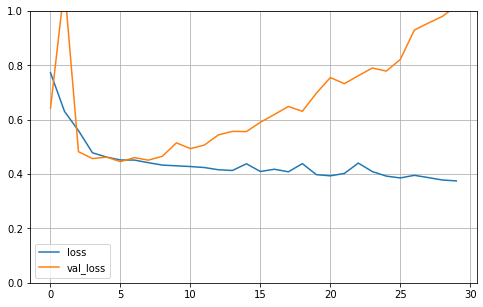

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#이상하게도 validation에 대해서도 상당한 과적합이 나와버린다... 이상한 방향으로 학습을 진행하고 있는 것 같음

In [40]:
#hold out에 대한 예측
mse_test = model_reg.evaluate(x_test, y_test)

162/162 [==============================] - 0s 741us/step - loss: 5.0276


In [41]:
from sklearn import metrics
#새로운 데이터에 대해 예측
x_new = x_test[:3]
y_pred = model_reg.predict(x_new)
metrics.mean_squared_error(y_pred, y_test[:3])

2.465568035774073

대충 정리하자면 Keras Sequential API를 이용한 모형 구축은

> 1) kreas.models.Sequential 을 이용하여 모델 구축 

> 2) 모델 compile - 손실함수와 옵티마이저(ex 경사하강법) , 부가적으로 훈련과 평가시 계산할 지표 또한 지정 가능(metrics), 이는 단순히 측정 지표이다

> 3) fit()메서드를 통해 모델 훈련 및 predict를 통한 값 에측

## 10.2.4 함수형 API를 사용하여 복잡한 모델 구축

In [37]:
#input 객체 생성 - shape과 dtype을 이용하여 input을 구축
input_ = keras.layers.Input(shape = x_train.shape[1:])

#Dense층 생성
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1) #뒤에 이렇게 함수처럼 넣을 객체를 지정해준다.
#함수처럼이 무슨 의미냐면 sum()처럼 만들자마자 위의 값을 함수처럼 넣는다는 의미

#concatenate층으로 *두번째 은닉층과 input층을 연결해준다.*
concat = keras.layers.Concatenate()([input_, hidden2])
#이게 왜 생긴거냐면 와이드 경로는 입력의 일부 또는 전체가 바로 출력층으로 전달! 그래서 와이드 신경망을 구축하기 위해 넣은 것이라 생각하면 된다.

#출력층 만들기 - concat을 받는다는 것은 input의 값과 hidden2의 출력값을 여기서 출력해준다는 의미다.
output = keras.layers.Dense(1)(concat)

#input과 output을 만들어 케라스 모델을 구축한다
model = keras.Model(inputs = [input_], outputs = [output])

- 입력층 두개 만들기

In [38]:
#5개의 특성은 짧은 경로로 보내고, 6개의 특성은 깊은 경로로 보낸다고 가정

#input층 만들기
input_A = keras.layers.Input(shape = [5], name = 'wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')

#Dense층 만들기
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1) 

#concatenate층 만들기
concat = keras.layers.Concatenate()([input_A, hidden2])

#output층 만들기
output = keras.layers.Dense(1, name = 'output')(concat)

#input과 output을 통해 케라스 모델 구축
model2 = keras.Model(inputs = [input_A, input_B], outputs = [output])

위 경우 학습할 때 튜플 형태인 x_train_A, x_train_B 이렇게 보내줘야 한다. 

In [39]:
np.random.seed(1234)

#model complie - 손실함수와 옵티마이저 구축 
model2.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr = 0.001))

#train, valid, test셋 나누기
x_train_A,  x_train_B = x_train[:,:5], x_train[:, 2:] #0에서 4번까지의 특성은 A로, 2번에서 7번까지의 특성은 B로 보낸다. 여기서 특성은 변수인 것 같다.
x_valid_A,  x_valid_B = x_valid[:,:5], x_valid[:, 2:] 
x_test_A,  x_test_B = x_test[:,:5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

#model fit 하기
history2 = model2.fit((x_train_A, x_train_B), y_train, epochs = 30,
                     validation_data = ((x_valid_A, x_valid_B), y_valid))


Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 3.2486 - val_loss: 0.9077
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.8686 - val_loss: 0.7105
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7620 - val_loss: 0.6552
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6683 - val_loss: 0.6270
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6599 - val_loss: 0.6042
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6529 - val_loss: 0.5840
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6376 - val_loss: 0.5670
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6209 - val_loss: 0.5527
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5953 - val_loss: 0.5419
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5695 - val_loss: 0.5300

In [40]:
#holdout에 대한 결과!
mse_test = model2.evaluate((x_test_A, x_test_B), y_test)


162/162 [==============================] - 0s 770us/step - loss: 0.4629


In [41]:
from sklearn import metrics

#새로운 데이터 예측
y_pred = model2.predict((x_new_A, x_new_B))

#예측한 데이터 평가
metrics.mean_squared_error(y_true = y_test[:3], y_pred = y_pred)

0.3264366554921867

- 출력 여러개 만들기

에를 들어 얼굴 사진을 분류할때 한 출력은 사람의 얼굴 표정(기쁨, 슬픔 등)을 분류하고 다른 출력은 안경을 썼는지 구별한다면, 아주 편한 모델을 구축할 수 있다

In [42]:
#5개의 특성은 짧은 경로로 보내고, 6개의 특성은 깊은 경로로 보낸다고 가정 + 출력을 두개로 나눈다고 해보자.

#input층 만들기
input_A = keras.layers.Input(shape = [5], name = 'wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')

#Dense층 만들기
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1) 

#concatenate층 만들기
concat = keras.layers.Concatenate()([input_A, hidden2])

#이전까지는 위와 동일
output = keras.layers.Dense(1, name = 'output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden2) #hidden2만 사용해서!

#모형 구축 - output을 두개 넣어주면 된다.
model3 = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])


In [43]:
#각 출력은 자신만의 손실함수가 필요 + 각 출력에 가중치를 다르게 할당할 수 있다
model3.compile(loss = ['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer = 'sgd')

In [44]:
# 각 출력에 대한 레이블을 제공해야 한다. 여기서는 주 출력과 보조출력이 같은 것을 예측해야 하므로 동일한 레이블을 사용한다.
history3 = model3.fit(
x = ([x_train_A, x_train_B]), y = ([y_train, y_train]), epochs= 30,
    validation_data = ([x_valid_A, x_valid_B], [y_valid, y_valid])
)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.6580 - output_loss: 1.5742 - aux_output_loss: 2.4125 - val_loss: 0.6221 - val_output_loss: 0.5468 - val_aux_output_loss: 1.2995
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7656 - output_loss: 0.7134 - aux_output_loss: 1.2351 - val_loss: 0.5212 - val_output_loss: 0.4635 - val_aux_output_loss: 1.0407
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5739 - output_loss: 0.5235 - aux_output_loss: 1.0272 - val_loss: 0.4928 - val_output_loss: 0.4506 - val_aux_output_loss: 0.8731
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5624 - output_loss: 0.5225 - aux_output_loss: 0.9215 - val_loss: 0.4520 - val_output_loss: 0.4184 - val_aux_output_loss: 0.7551
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5049 - output_loss: 0.4706 - aux_output_loss: 0.8137 - val_loss: 0.4372 - val_output_loss: 0.4093 - val_aux_

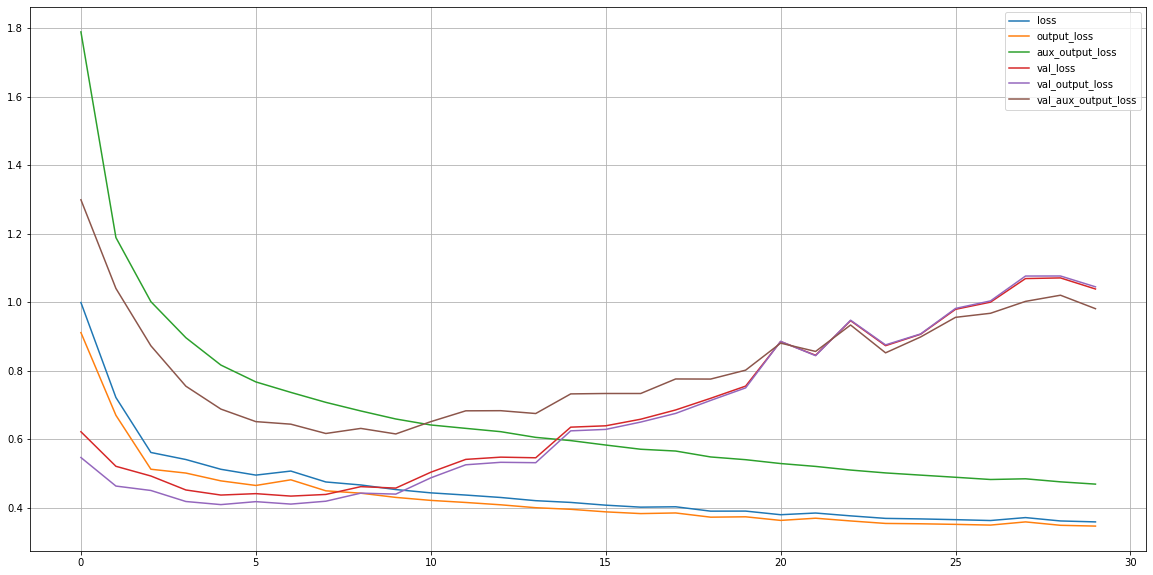

In [45]:
import matplotlib.pyplot as plt

pd.DataFrame(history3.history).plot(figsize = (20,10))
plt.grid(True)
plt.show()

In [46]:
#holdout에 대한 예측
total_loss, main_loss, aux_loss = model3.evaluate(
    [x_test_A, x_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 1ms/step - loss: 0.4503 - output_loss: 0.4402 - aux_output_loss: 0.5412


In [47]:
y_pred_main, y_pred_aux = model3.predict([x_new_A, x_new_B])

함수형 API를 이용하면 상당히 유연한 모델을 구축할 수 있는 것으로 사료된다.

만약 여기에 분류 모형을 구축하려면? 당연히 output Dense에 활성화함수를 'softmax'나 'sigmoid'로 해주면 된다.

## 10.2.5 서브클래싱 API로 동적 모델 구축

함수형 API는 먼저 연결방식을 정의한 뒤에 모델에 데이터를 주입하여 훈련이나 추론을 시작하게 된다. 

반복문을 포함하고 다양한 크기를 다루어야 하며, 조건문을 가지기 위해서는 동적인 구조가 필요! 이때는 서브클래싱 API를 사용해야 한다.

In [48]:
class WideAndDeepModel(keras.Model) : 
    
    def __init__(self, units, activation, **kwargs) : 
        
        super().__init(**kwargs) #class에서 넣은 keras.Model을 상속받는다! 이 함수는 초기화를 재사용한다는 것이다!
        
        self.hidden1 = keras.layers.Dense(units, activation = activation) #hidden1 레이어 초기화
        self.hidden2 = keras.layers.Dense(units, activation = activation) #hidden2 레이어 초기화
        self.main_output = keras.layers.Dense(1) #main_output 초기화
        self.aux_output = keras.layers.Dense(1) #보조 output 초기화
        
    def call(self, inputs) : 
        input_A, input_B = inputs
        hidden1 = self.hidden(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

TypeError: __init__() missing 2 required positional arguments: 'units' and 'activation'

위 코드를 실행하지는 않겠지만 해당 방식으로 유연하게 만들 수 있다는 것 같다.

call 메서드의 input 매개변수를 활용할 수 있다!

call 메서드 내에서 for문 if문 등 다양한 연산을 활용할 수 있다는 것이 강점!

## 10.2.6 모델 저장과 복원

In [49]:
#위에서 만들었던 2개의 input과 보조출력을 함께 출력하는 모델을 저장해보자
#input층 만들기
input_A = keras.layers.Input(shape = [5], name = 'wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')

#Dense층 만들기
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1) 

#concatenate층 만들기
concat = keras.layers.Concatenate()([input_A, hidden2])

#이전까지는 위와 동일
output = keras.layers.Dense(1, name = 'output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden2) #hidden2만 사용해서!

#모형 구축 - output을 두개 넣어주면 된다.
model3 = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

#각 출력은 자신만의 손실함수가 필요 + 각 출력에 가중치를 다르게 할당할 수 있다
model3.compile(loss = ['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer = 'sgd')

# 각 출력에 대한 레이블을 제공해야 한다. 여기서는 주 출력과 보조출력이 같은 것을 예측해야 하므로 동일한 레이블을 사용한다.
model3.fit(
x = ([x_train_A, x_train_B]), y = ([y_train, y_train]), epochs= 20,
    validation_data = ([x_valid_A, x_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5628 - output_loss: 1.4549 - aux_output_loss: 2.5346 - val_loss: 0.5806 - val_output_loss: 0.5244 - val_aux_output_loss: 1.0865
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6190 - output_loss: 0.5646 - aux_output_loss: 1.1085 - val_loss: 0.4742 - val_output_loss: 0.4298 - val_aux_output_loss: 0.8740
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5400 - output_loss: 0.4962 - aux_output_loss: 0.9345 - val_loss: 0.4429 - val_output_loss: 0.4090 - val_aux_output_loss: 0.7474
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4958 - output_loss: 0.4590 - aux_output_loss: 0.8271 - val_loss: 0.4345 - val_output_loss: 0.4095 - val_aux_output_loss: 0.6596
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4724 - output_loss: 0.4428 - aux_output_loss: 0.7394 - val_loss: 0.4465 - val_output_loss: 0.4278 - val_aux_

In [50]:
model3.save("my_keras_model.h5")

In [51]:
model = keras.models.load_model('my_keras_model.h5')

## 10.2.7 콜백 사용하기

In [52]:
#모델 만들고 컴파일 
input_A = keras.layers.Input(shape = [5], name = 'wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1) 
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name = 'output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden2) #hidden2만 사용해서!
model3 = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])
model3.compile(loss = ['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer = 'sgd')

#call백으로 긴 학습시간에 갑자기 꺼지는 것을 우려하지 않아도 된다.
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only = True) #최상의 검증세트에서만 모델을 저장함
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True) #성이 향상되지 않으면 훈련을 멈추고 저장한다!
                                                  
                                                  
#훈련을 진행!
history = model3.fit(
x = ([x_train_A, x_train_B]), y = ([y_train, y_train]), epochs= 100,
    validation_data = ([x_valid_A, x_valid_B], [y_valid, y_valid]), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.6107 - output_loss: 1.4099 - aux_output_loss: 3.4184 - val_loss: 0.5671 - val_output_loss: 0.4825 - val_aux_output_loss: 1.3285
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5814 - output_loss: 0.5050 - aux_output_loss: 1.2688 - val_loss: 0.5059 - val_output_loss: 0.4402 - val_aux_output_loss: 1.0968
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5606 - output_loss: 0.4991 - aux_output_loss: 1.1141 - val_loss: 0.4953 - val_output_loss: 0.4452 - val_aux_output_loss: 0.9460
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5264 - output_loss: 0.4776 - aux_output_loss: 0.9655 - val_loss: 0.4584 - val_output_loss: 0.4196 - val_aux_output_loss: 0.8083
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5600 - output_loss: 0.5183 - aux_output_loss: 0.9353 - val_loss: 0.4855 - val_output_loss: 0.4525 - val

In [53]:
model_good = keras.models.load_model('my_keras_model.h5')

## 10.2.8 텐서보드를 활용해 시각화

In [58]:
#텐서보드 로그를 위해 사용할 루트 로그 디렉터리를 정의
import os
root_logdir = os.path.join(os.curdir, 'my_logs') #현재 dir에 my_logs라는 폴더를 만들고 이를 root_logdir에 저장한다

#실행할때마다 다른 서브디렉터리 경로를 생성하는 |함수도 생성 
def get_run_log_dir() : 
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id) #실행할때마다 현재시점의 폴더를 생성한다. 

run_logdir = get_run_log_dir()

In [55]:

np.random.seed(1234)

#모델 만들고 컴파일 
input_A = keras.layers.Input(shape = [5], name = 'wide_input')
input_B = keras.layers.Input(shape = [6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1) 
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name = 'output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden2) #hidden2만 사용해서!
model3 = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])
model3.compile(loss = ['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer = 'sgd')

#텐서보드 시행
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model3.fit(
x = ([x_train_A, x_train_B]), y = ([y_train, y_train]), epochs= 100,
    validation_data = ([x_valid_A, x_valid_B], [y_valid, y_valid]), callbacks = [tensorboard_cb])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.8042 - output_loss: 1.6150 - aux_output_loss: 3.5066 - val_loss: 0.7925 - val_output_loss: 0.7395 - val_aux_output_loss: 1.2701
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6222 - output_loss: 0.5541 - aux_output_loss: 1.2344 - val_loss: 0.5861 - val_output_loss: 0.5300 - val_aux_output_loss: 1.0910
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5715 - output_loss: 0.5098 - aux_output_loss: 1.1270 - val_loss: 0.4759 - val_output_loss: 0.4268 - val_aux_output_loss: 0.9175
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5371 - output_loss: 0.4870 - aux_output_loss: 0.9886 - val_loss: 0.4549 - val_output_loss: 0.4162 - val_aux_output_loss: 0.8033
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5026 - output_loss: 0.4626 - aux_output_loss: 0.8626 - val_loss: 0.4413 - val_output_loss: 0.4104 - val

> 현재 파이썬을 실행시킨 디렉토리 (나의 경우 deep_learning폴더)에서 tensorboard --logdir=./my_logs --port=6006을 실행시키고

> http://localhost:6006 을 쳐주면 된다

텐서보드는 주피터 내에서도 볼 수 있다

In [56]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 12432), started 0:02:53 ago. (Use '!kill 12432' to kill it.)

tensorboard를 잘 활용하면 좋은 도구가 될 수 있다고 한다.

In [16]:
#tensorborad test
import numpy as np

test_logdir = get_run_log_dir()
writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default() : 
    for step in range(1, 1000 + 1) : #이렇게 하면 1부터 1000까지의 값이라는 것을 명시해줄 수 있는 것 같다. 생각보다 간단하게
        tf.summary.scalar('my_scalar', np.sin(step / 10), step = step) #summary에는 step이 필요한 듯 싶음
        
        data = (np.random.randn(100) + 2) * step / 100 #normal 분포를 쭉 뽑아주게 된다.
        tf.summary.histogram('my_hist', data, buckets = 50, step = step)
        
        images = np.random.rand(2,32,32,3) #32x32 RGB 이미지
        tf.summary.image('my_images', images * step / 1000, step=step)
        
        texts = ['the step is' + str(step), 'its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step = step)
        
        sine_wave = tf.math.sin(tf.range(12000)/48000*2*np.pi*step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step = step)  

NameError: name 'get_run_log_dir' is not defined

# 10.3 HYPERPPARAMETER TUNING

In [42]:
#시퀀셜 API를 활용해 모델을 구축함
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape=[8]) : #우선 적잘한 기본값 설정
    
    #모델 구축
    model = keras.models.Sequential()
    
    #input layer
    model.add(keras.layers.InputLayer(input_shape = input_shape)) 
    
    #hideen layer
    for layer in range(n_hidden) : 
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
        
    #output layer    
    model.add(keras.layers.Dense(1)) 
    
    #활성화기 정의
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    
    #모델 compile
    model.compile(loss= 'mse', optimizer = optimizer)
    return model

In [43]:
x_train.shape

(11610, 8)

함수형 API는 레이어에 이전 레이어를 넣어야 해서 사용하지 않는 것 같다

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

np.random.seed(1234)
keras_reg.fit(x_train, y_train, epochs = 100,
             validation_data = (x_valid, y_valid),
             callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(x_test, y_test)
y_pred = keras_reg.predict(x_new)

In [55]:
#새로운 데이터에 대한 성능 판정
print("새로운 데이터에 대한 MSE : {0}".format(metrics.mean_squared_error(y_pred, y_test[:3])))
print("새로운 데이터에 대한 MAE : {0}".format(metrics.mean_absolute_error(y_pred, y_test[:3])))

새로운 데이터에 대한 MSE : 1.580381375605345
새로운 데이터에 대한 MAE : 1.0764757872454325


In [59]:
print(x_valid.shape)
print(x_train.shape)

(3870, 8)
(11610, 8)


아쉽게도 randomsearch를 진행하면 sklearn의 버그가 발생한다고 한다. 과연 bayesian으로 진행할 수 있을까?

In [83]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#파라미터 범위 지정
params = {
    'n_hidden' : (0,3)
    ,'n_neurons' : (1,100)
    ,'learning_rate' : (3e-4, 3e-1)
}

#우리가 Optimize할 함수 지정
def keras_hyper_param(n_hidden, n_neurons, learning_rate):

    X = x_train
    y = y_train
    
    n_hidden = int(n_hidden)
    
    keras_bayes = build_model(n_hidden = n_hidden, n_neurons = n_neurons, learning_rate = learning_rate)
    
    #이 return값이 손실함수이기 때문에 이를 최대화(원래는 최소화)하는 방향으로 탐색하게 됨.
    return np.mean(cross_val_score(keras_bayes, X, y, cv=5, scoring='neg_root_mean_squared_error'))


optimizer_ei = BayesianOptimization(f=keras_hyper_param, 
                                 pbounds=params, #아마 parameter bounds가 아닌가 싶다.
                                 random_state=1234)

optimizer_ei.maximize(init_points=3, n_iter = 100, acq='ei', xi=0.01)

best_param_ei = optimizer_ei.max

print("best params : {0} /n best score : {1}".format(best_param_ei['params'], best_param_ei['target']))

|   iter    |  target   | learni... | n_hidden  | n_neurons |
-------------------------------------------------------------


TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C028257880>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.